# Aruco marker recognition
### Get in touch with aruco library
First use aruco library functions to detect markers in images.
Markers are printed in A4 sheets, photos are taken by phone. Camera calibration is not needed for this first part.

In [1]:
# Import libraries once
import numpy as np
import cv2
import cv2.aruco as aruco
import matplotlib.pyplot as plt

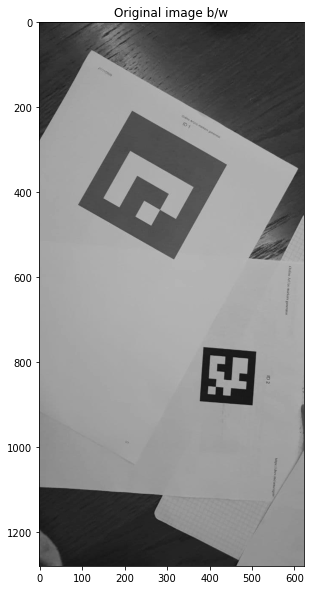

ID: [2]; Corners: [[[509. 775.]
  [500. 901.]
  [377. 891.]
  [385. 765.]]]


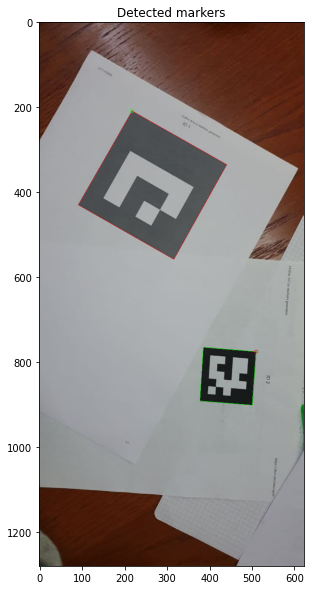

In [2]:
# Constant parameters used in Aruco methods
ARUCO_PARAMETERS = aruco.DetectorParameters_create()
ARUCO_DICT = aruco.Dictionary_get(aruco.DICT_5X5_50)

# Read the image with the markers
queryImg = cv2.imread("test-imgs/two-aruco-types.jpg")

# grayscale image
grayQueryImg = cv2.cvtColor(queryImg, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(20,10))
plt.imshow(grayQueryImg, cmap='gray', vmin=0, vmax=255)
plt.title("Original image b/w")
plt.show()

#======== Detect Aruco markers ========
corners, ids, rejectedImgPoints = aruco.detectMarkers(queryImg, ARUCO_DICT, parameters=ARUCO_PARAMETERS)
# For each marker found is returned
# - list of 4 corners in clockwise order from top-left one
# - the list of ids of each of the detected markers in markerCorners

# Check if at least one marker has been found
if ids is not None and len(ids) >= 1:
    # Print corners and ids to the console
    for i, corner in zip(ids, corners):
        print('ID: {}; Corners: {}'.format(i, corner))

    # Outline all of the markers detected in the image
    # Draw a green contour around the valid markers
    detectedArucoImg = aruco.drawDetectedMarkers(queryImg, corners, borderColor=(0, 255, 0))
    
    # Draw a red contour around discarded markers
    if rejectedImgPoints is not None and len(rejectedImgPoints) >= 1:
        detectedArucoImg = aruco.drawDetectedMarkers(detectedArucoImg, rejectedImgPoints, borderColor=(0, 0, 255))

    # Display result
    cv2.imshow('Detected markers', detectedArucoImg)
    plt.figure(figsize=(20,10))
    plt.imshow(cv2.cvtColor(detectedArucoImg, cv2.COLOR_BGR2RGB))
    plt.title("Detected markers")
    plt.show()
    
    cv2.waitKey(0)
else:
    print("No marker detected!")
    print("Rejected points:", rejectedImgPoints)

cv2.destroyAllWindows()

In previous code all worked as expected. The biggest aruco was not recognise because is from 4x4 dictionary, not 5x5 as the second one.

Just an utility function for closing windows

In [3]:
cv2.destroyAllWindows()

### Edit aruco markers
Delete the arucos found in the image and write their ID

Corners: [[[509. 775.]
  [500. 901.]
  [377. 891.]
  [385. 765.]]]


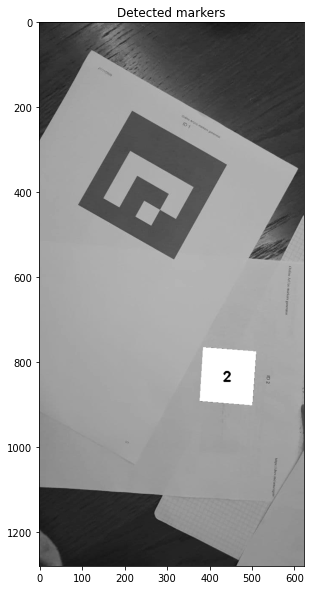

In [4]:
font = cv2.FONT_HERSHEY_SIMPLEX

arucoIDImg = np.copy(grayQueryImg)
# Check if some aruco has been found
if ids is not None and len(ids) >= 1:
    for i, corner in zip(ids, corners):
        print("Corners:", corner)
        cv2.fillPoly(arucoIDImg, corner.astype(int), 255)
        
        center = np.abs(corner[0][0] + corner[0][2]) / 2
        textX, textY = center
        textsizeX, textsizeY = cv2.getTextSize(str(i[0]), font, 1, 3)[0]
        textX = (textX - textsizeX / 2).astype(int)
        textY = (textY + textsizeY / 2).astype(int)
        cv2.putText(arucoIDImg, str(i[0]), (textX, textY), font, 1, (0, 0, 0), 3)
        
    plt.figure(figsize=(20,10))
    plt.imshow(arucoIDImg, cmap='gray', vmin=0, vmax=255)
    plt.title("Detected markers")
    plt.show()
else:
    print("No markers in image.")

### Identify the rectangle in witch the aruco is included
The aruco would be in white rectangle containing the switches, once get the area, the search can be restricted.

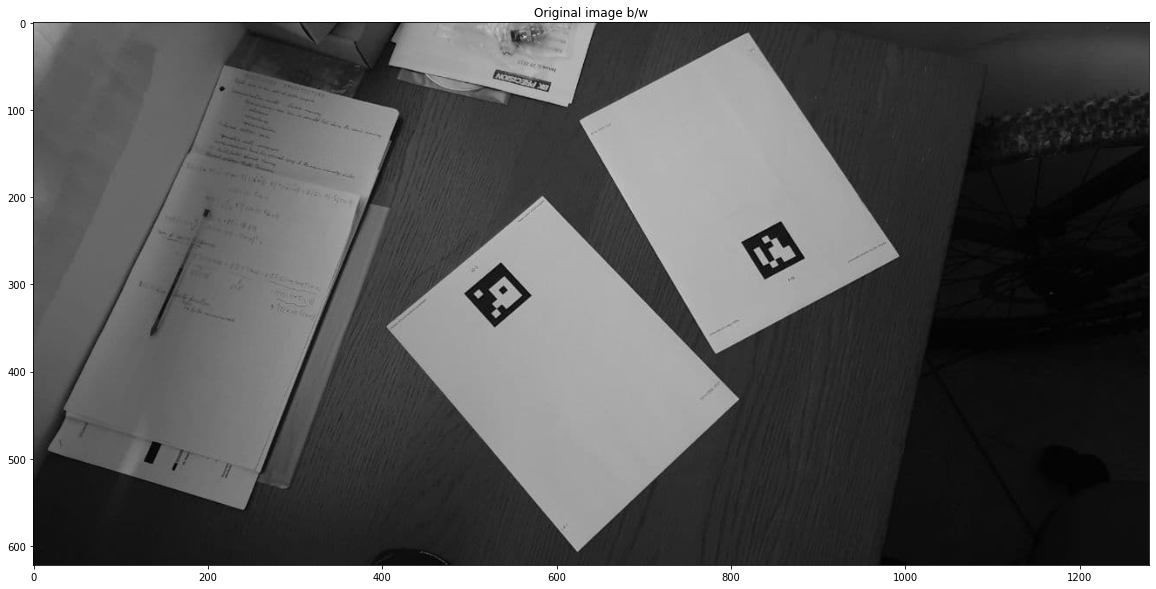

Corners: [array([[[884., 271.],
        [839., 294.],
        [812., 252.],
        [857., 228.]]], dtype=float32), array([[[494., 311.],
        [537., 276.],
        [571., 313.],
        [529., 349.]]], dtype=float32)]
Detected aruco with ID: [4].
Detected aruco with ID: [3].
Areas: [2.0, 1.0, 0.0, 3.5, 1.0, 80024.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3047.5, 42.5, 73.5, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.0, 0.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 24.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 27.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 34.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 22.5, 2.0, 2.0, 2.0, 26.0, 31.0, 2.0, 33.0, 2.0, 2.0, 2.0, 70113.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2774.0, 38.5, 127.5, 16093.0, 33.5, 2.0, 2.0, 835.5, 2.0, 8.5, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 11.0, 2.0, 2.0, 2.0, 1.0, 2.0]


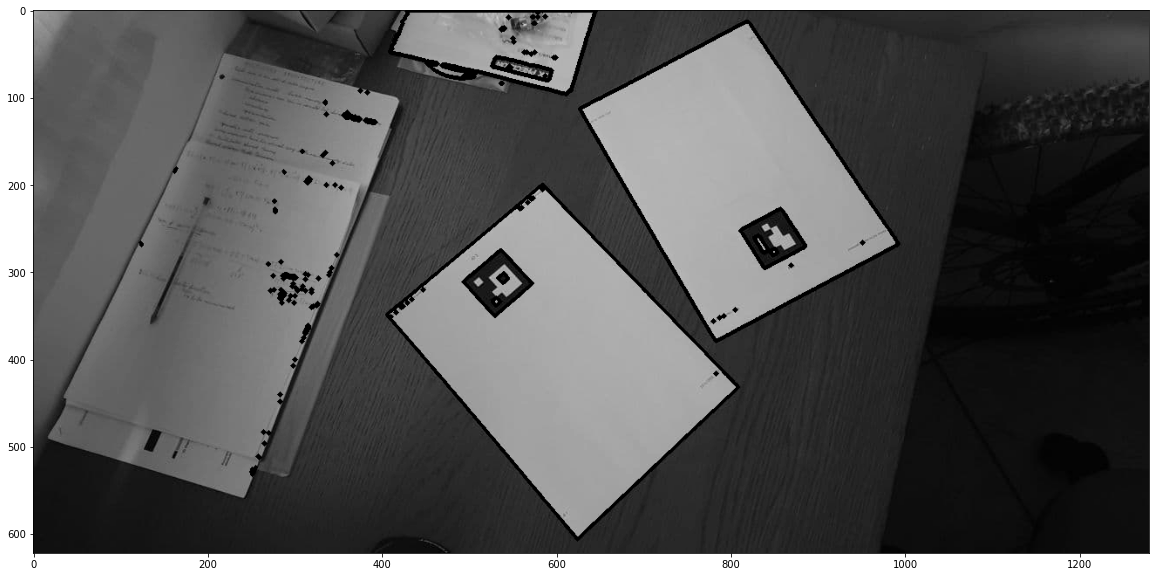

In [13]:
import numpy
import cv2
import cv2.aruco as aruco
import matplotlib.pyplot as plt

# Constant parameters used in Aruco methods
ARUCO_PARAMETERS = aruco.DetectorParameters_create()
ARUCO_DICT = aruco.Dictionary_get(aruco.DICT_5X5_50)

# Read the image
queryImg = cv2.imread("test-imgs/two-A4-splitted.jpg")

cv2.imshow('QueryImage', queryImg)

# grayscale image
grayQueryImg = cv2.cvtColor(queryImg, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(20,10))
plt.imshow(grayQueryImg, cmap='gray', vmin=0, vmax=255)
plt.title("Original image b/w")
plt.show()
grayQueryImg = cv2.convertScaleAbs(grayQueryImg)


#======== Detect Aruco markers ========
corners, ids, rejectedImgPoints = aruco.detectMarkers(queryImg, ARUCO_DICT, parameters=ARUCO_PARAMETERS)
# For each marker found is returned
# - list of 4 corners in clockwise order from top-left one
# - the list of ids of each of the detected markers in markerCorners

print("Corners:", corners)

# Check if at least one marker has been found
if ids is not None and len(ids) >= 1:
    # Print corners and ids to the console
    for i in ids:
        print('Detected aruco with ID: {}.'.format(i))
    #cv2.contourArea(contour)

    ret, thresh = cv2.threshold(grayQueryImg, 127, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # Identify rectangular contours
    rect_cnts = []
    areas = []
    for cnt in contours:
        peri = cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt, 0.04 * peri, True)
        (x, y, w, h) = cv2.boundingRect(cnt)
        #ar = w / float(h)
        if len(approx) == 4: # shape filtering condition
            rect_cnts.append(cnt)
            area = cv2.contourArea(cnt)
            areas.append(cv2.contourArea(cnt))
            
    cv2.drawContours(grayQueryImg, rect_cnts, -1, (0,255,0), 3)
    print("Areas:", areas)

    # Display our image
    cv2.imshow('QueryImage', grayQueryImg)
    plt.figure(figsize=(20,10))
    plt.imshow(grayQueryImg, cmap='gray', vmin=0, vmax=255)
    plt.show()
    
    cv2.waitKey(0)
else:
    print("No marker detected!")

cv2.destroyAllWindows()

In [16]:
import numpy as np

seg1 = np.sqrt((884-839)**2+(271-294)**2)
seg2 = np.sqrt((839-812)**2+(294-252)**2)
print(seg1, seg2)
area = seg1 * seg2
print("Area:", area)

50.53711507397311 49.92995093127971
Area: 2523.315675851914
